Loading modules... 
Done...


<ipython-input-2-7ad4a31305d5>:26: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (lam**5) * (np.exp(b) - 1.0) )
<ipython-input-2-7ad4a31305d5>:35: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (lam**5) * (np.exp(b)) )


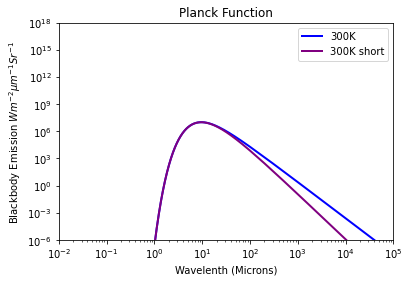

In [2]:
"""
This program plots the Planck function of a blackbody object
"""

print("Loading modules... ")
import matplotlib.pyplot as p #import pylab as p
import numpy as np #import numpy as np
import math
print("Done...")

#Constants for Planck
h=6.626E-34      #Planck's  Constant
k=1.381E-23      #Boltzmann's Constant
c=2.988E8        #Speed of Light

#Information to Input
Tsun=6000.                 #Temperature of object in Kelvin
Tearth=300.
#Define function to calculate Planck emission

def B(lam,T):
    #u=1.*h*c/(lam*k*T) #To prevent overflow
    #return (2.*h*c*c)/((math.exp(u)-1.)*(lam**5))
    a = 2.0*h*c**2
    b = h*c/(lam*k*T)
    intensity = a/ ( (lam**5) * (np.exp(b) - 1.0) )
    return intensity

########################CREATE FUNCTIONS HERE FOR THE APPROXIMATIONS###############
def Bshort(lam,T):
    #u=1.*h*c/(lam*k*T) #To prevent overflow
    #return (2.*h*c*c)/((math.exp(u)-1.)*(lam**5))
    a = 2.0*h*c**2
    b = h*c/(lam*k*T)
    intensity = a/ ( (lam**5) * (np.exp(b)) )
    return intensity

###################################################################################

#Create array of wavelengths (in meters)
lamarray=np.append(np.arange(1e-8, 1e-4, 1e-8),np.arange(1e-4, 100e-3, 1e-4))

#Calculate blackbody emission using the functions
sun_blackbody_full=B(lamarray,Tsun)
earth_blackbody_full=B(lamarray,Tearth)

earth_blackbody_short=Bshort(lamarray,Tearth)


#p.plot(lamarray*10**6.,sun_blackbody_full,linewidth=2,color="red",label="6000K",) 
p.plot(lamarray*10**6.,earth_blackbody_full,linewidth=2,color="blue",label="300K",linestyle='-')
p.plot(lamarray*10**6.,earth_blackbody_short,linewidth=2,color="purple",label="300K short",linestyle='-') 
####Add plot commands as needed to plot additional lines. Make sure each line is different color or style

p.title("Planck Function")
p.xlabel("Wavelenth (Microns)")
p.ylabel("Blackbody Emission $ W m^{-2} \mu m^{-1} Sr^{-1} $")
p.xscale('log')
p.yscale('log')
p.axis([1e-2, 100e3, 10e-7, 10e17])
p.legend(loc="upper right")
#p.savefig('output//WH3_Planck.png',dpi=150) 
p.show()